## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
### Compute the camera calibration matrix and distortion coefficients given a set of chessboard images

In [1]:
import transformer
camera = transformer.Camera()
camera.calibrate('camera_cal/calibration*.jpg', 9, 6)
print("\nCamera Calibration Matrix: \n{0}".format(camera.mtx))
print("\nCamera Distortion coefficients: \n{0}".format(camera.dist))


Camera Calibration Matrix: 
[[1.15777818e+03 0.00000000e+00 6.67113857e+02]
 [0.00000000e+00 1.15282217e+03 3.86124583e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Camera Distortion coefficients: 
[[-0.24688507 -0.02373155 -0.00109831  0.00035107 -0.00259868]]


### Source and destination pixels are provided and transformation matrix M and inverse transform Matrix Minv are calculated

In [2]:
import numpy as np

src = np.float32([[433, 563], [866, 563], [1041, 675], [280, 675]])
dst = np.float32([[280, 565], [1042, 563], [1041, 675], [280, 675]])
camera.set_matrix(src, dst)

print("\nCamera Warp Matrix M: \n{0}".format(camera.M))

print("\nCamera Inverse Warp Matrix Minv: \n{0}".format(camera.Minv))


Camera Warp Matrix M: 
[[-6.19878012e-01 -1.53260191e+00  1.03016610e+03]
 [ 1.00508686e-02 -1.99415747e+00  9.14361435e+02]
 [ 1.48901756e-05 -2.42895990e-03  1.00000000e+00]]

Camera Inverse Warp Matrix Minv: 
[[ 1.81208826e-01 -7.74750723e-01  5.21726994e+02]
 [ 2.84780232e-03 -5.07549263e-01  4.61149763e+02]
 [ 4.21896640e-06 -1.22128064e-03  1.00000000e+00]]


### Example image is read in and distortion correction is applied

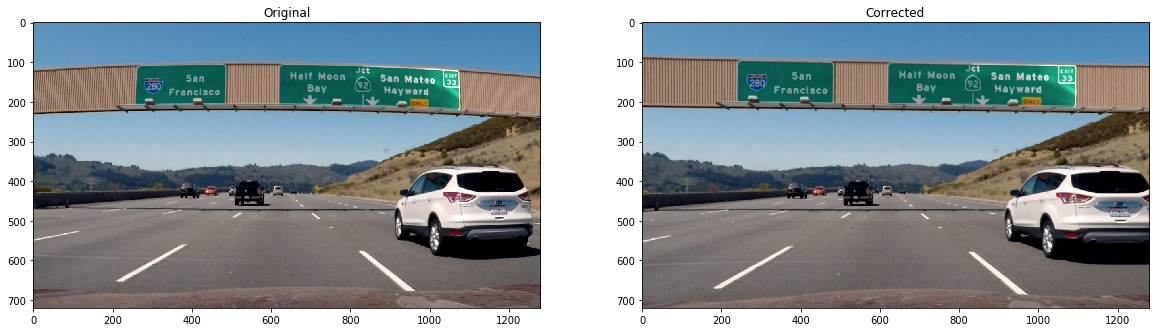

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib qt
%matplotlib inline

test_img = mpimg.imread('test_images/signs_vehicles_xygrad.png')
undistorted = camera.undistort(test_img)

# Plotting thresholded images
f, axes = plt.subplots(1, 2, figsize=(20,10))
axes[0].set_title('Original')
axes[0].imshow(test_img)

axes[1].set_title('Corrected')
axes[1].imshow(undistorted)

### Color transform applied on test image from project video

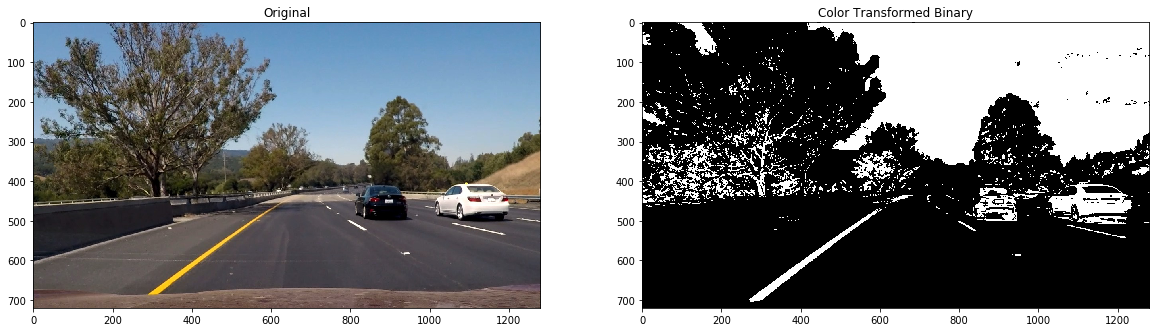

In [4]:
import threshold
thresh_filter = threshold.Filter()

test_img = mpimg.imread('test_images/test6.jpg')
undistorted = camera.undistort(test_img)
thresh_filter.color_transform(undistorted)

# Plotting thresholded images
f, axes = plt.subplots(1, 2, figsize=(20,10))
axes[0].set_title('Original')
axes[0].imshow(test_img)

axes[1].set_title('Color Transformed Binary')
axes[1].imshow(thresh_filter.color_transformed, cmap='gray')

### Gradient filters applied on color transformed image

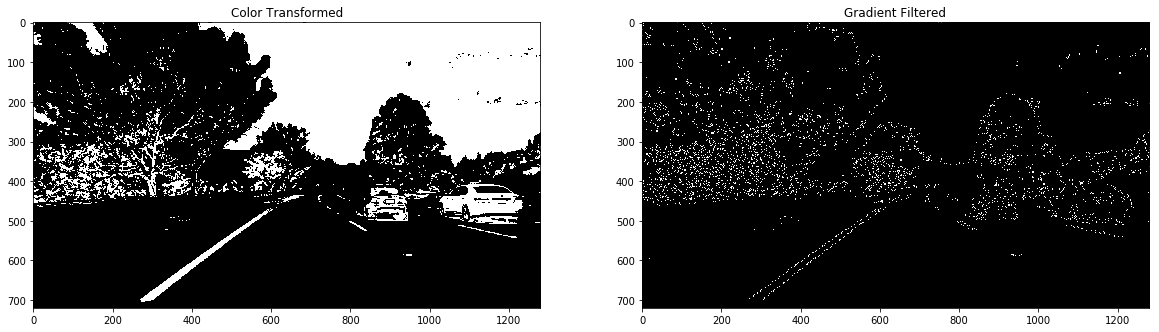

In [5]:
# Define Kernel size and thresholds
ksize=3
sobel_thresh=(20, 100)
mag_thresh=(30, 100)
dir_thresh=(0.7, 1.3)

thresh_filter.all_grad_filter(thresh_filter.color_transformed)

# Plotting thresholded images
f, axes = plt.subplots(1, 2, figsize=(20,10))
axes[0].set_title('Color Transformed')
axes[0].imshow(thresh_filter.color_transformed, cmap='gray')

axes[1].set_title('Gradient Filtered')
axes[1].imshow(thresh_filter.combined, cmap='gray')

### Apply a perspective transform to rectify binary image ("birds-eye view")

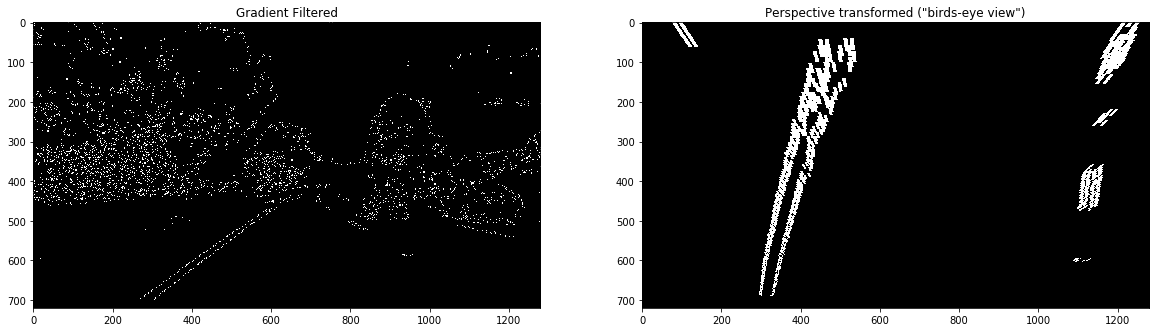

In [6]:
warped = camera.warp(thresh_filter.combined)
warped[warped > 0] = 255

# Plotting thresholded images
f, axes = plt.subplots(1, 2, figsize=(20,10))
axes[0].set_title('Gradient Filtered')
axes[0].imshow(thresh_filter.combined, cmap='gray')

axes[1].set_title('Perspective transformed ("birds-eye view")')
axes[1].imshow(warped, cmap='gray')

### Detect lane pixels and fit to find the lane boundary

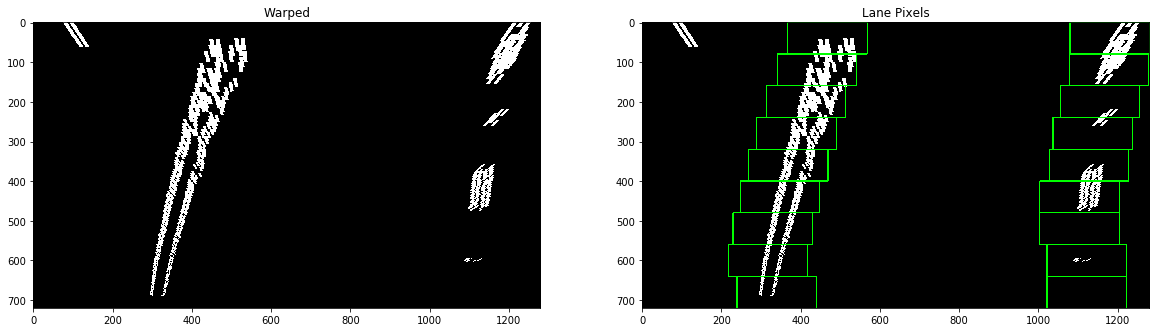

In [7]:
import lane
import cv2
laneProcessor = lane.LaneProcessor()
laneProcessor.detect_lane(undistorted, warped)
lane_pixels = laneProcessor.out_img

# Plotting thresholded images
f, axes = plt.subplots(1, 2, figsize=(20,10))
axes[0].set_title('Warped')
axes[0].imshow(warped, cmap='gray')

axes[1].set_title('Lane Pixels')
axes[1].imshow(lane_pixels)

### Determine the curvature of the lane and vehicle position with respect to center

In [8]:

left_curverad, right_curverad = laneProcessor.measure_curvature_real(laneProcessor.leftx, laneProcessor.lefty, 
                                                                 laneProcessor.rightx, laneProcessor.righty)
print("Radius of curvature: {0:.2f} (m)".format(np.minimum(left_curverad, right_curverad)))

Radius of curvature: 572.65 (m)


### Warp the detected lane boundaries back onto the original image

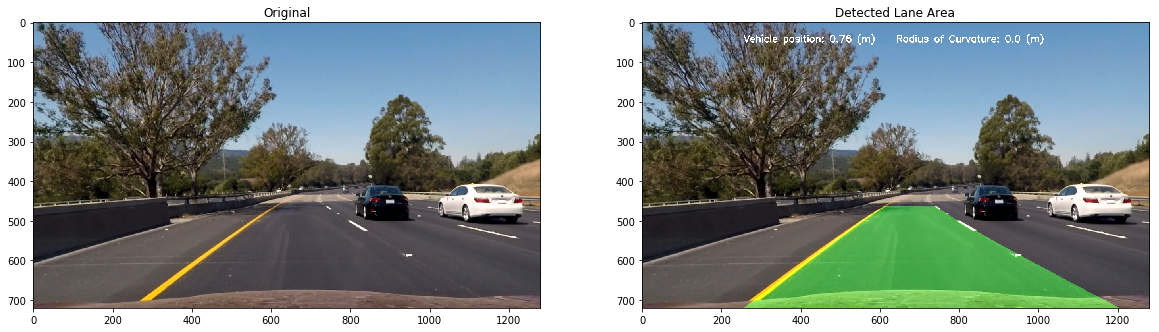

In [9]:
laneProcessor.draw_img(camera.Minv)
result =laneProcessor.out_img


# Plotting thresholded images
f, axes = plt.subplots(1, 2, figsize=(20,10))
axes[0].set_title('Original')
axes[0].imshow(undistorted)

axes[1].set_title('Detected Lane Area')
axes[1].imshow(result)

---
## Video Pipeline
### Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position
---

In [10]:
import video_pipeline

output = video_pipeline.execute()

[MoviePy] >>>> Building video output_videos/project_video.mp4
[MoviePy] Writing video output_videos/project_video.mp4


 99%|███████████████████████████████████████████████████████████████████████████████▎| 125/126 [00:28<00:00,  4.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_videos/project_video.mp4 



In [11]:
from IPython.display import HTML
HTML("""
<video width =960 height=540 controls>
  <source src="{0}">
</video>
""".format(output))